In [1]:
import scipy
import numpy as np
import numpy.linalg as ln
import pandas as pd
from IPython.display import display
#Visualization tool
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
#3D visualization tool
from mpl_toolkits.mplot3d import Axes3D

#Machine learning techniques
import sklearn
#Model Selection for determining best technique
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Regression: Supervised learning technique
from sklearn.linear_model import LogisticRegression
#Decision trees: Supervised learning technique
from sklearn.tree import DecisionTreeClassifier
#k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#Linear discriminant analaysis (LDA): Supervised learning technique
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Naive Bayes: Supervised learning technique
from sklearn.naive_bayes import GaussianNB
#Support vector machines (SVM -> SVC): Supervised learning technique
from sklearn.svm import SVC
#Principal component analysis (PCA): Unsupervised learning technique
from sklearn import decomposition
#Iris dataset
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset.columns = names
dataset.index = range(1,len(dataset.index.values)+1)
dataset['class'].replace(to_replace = [0.0, 1.0, 2.0], value = ['Setosa', 'Versicolor', 'Virginica'], inplace = True)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [3]:
#Checking data information
print(dataset.shape)
print()
pd.options.display.float_format = '{:.3f}'.format
display(dataset.describe())
print()
print(dataset.groupby('class').size())

(150, 5)



,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500



class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


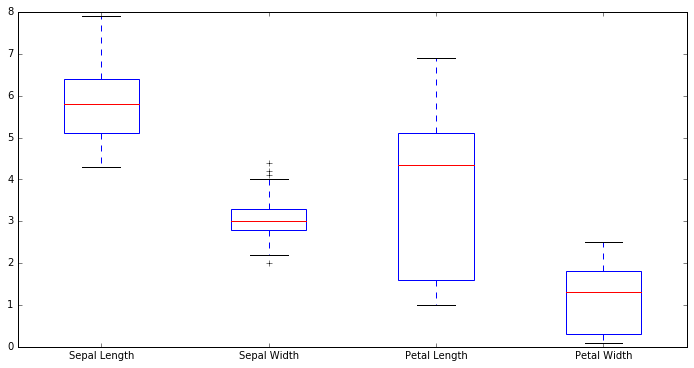

In [4]:
#Visualize data summary via boxplot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
axer = [dataset['sepal-length'], dataset['sepal-width'], dataset['petal-length'], dataset['petal-width']]
ax.boxplot(axer, vert= True, patch_artist=True)
plt.xticks([1,2,3,4], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

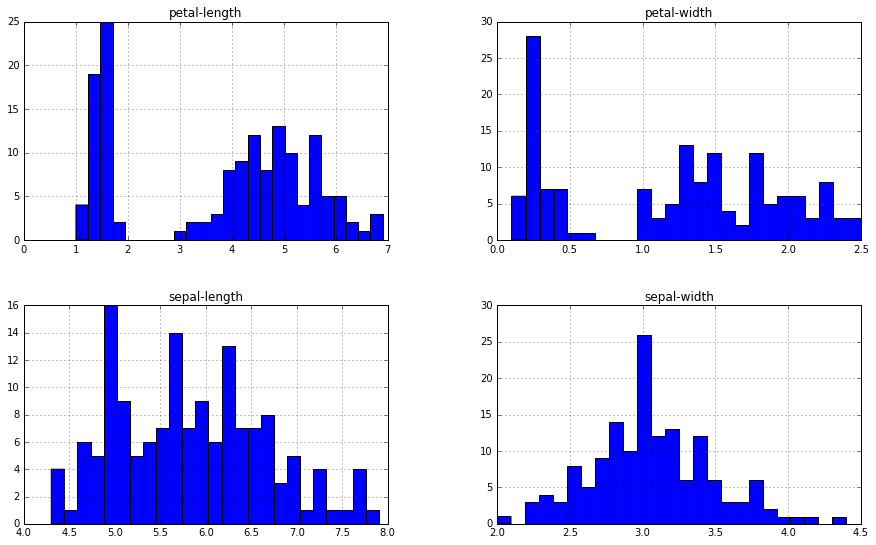

In [5]:
#Histogram summary of petal/sepal measurements
dataset[[i for i in list(dataset.columns) if i != 'class']].hist(figsize = (15,9), bins = 25)
plt.show()

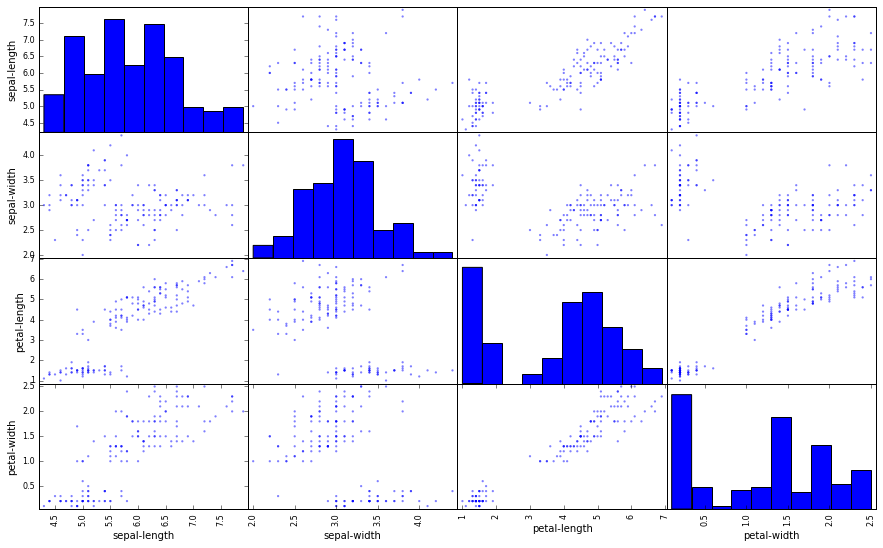

In [6]:
#Scatter matrix to look for correlations
#Observe good correlation between petal length and width
scatter_matrix(dataset, figsize=(15,9))
plt.show()

In [7]:
#Prepare training/testing data for machine learning technique accuracy comparison
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state=seed)

In [8]:
#Model selection of supervised techniques
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#models.append(('PCA', decomposition.PCA()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


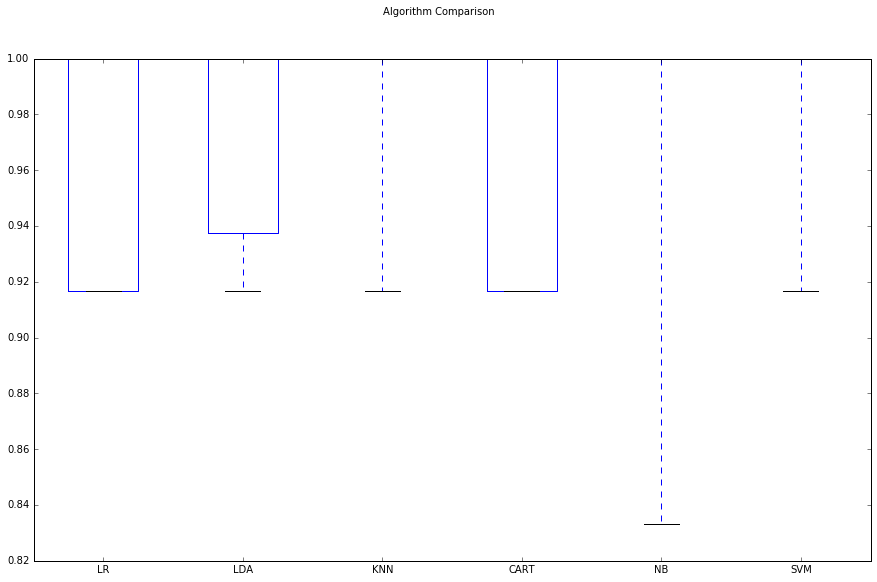

In [9]:
fig = plt.figure(figsize=(15,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()